In [1]:
#Importing required libraries

import pandas as pd #for creating data frames 

import warnings 

import matplotlib.pyplot as plt #to create data vizualizations 

In [2]:
#create dataframes for the given files and read the csv file 

airportcodes_dataframe = pd.read_csv('/Users/girijamangrulkar/Downloads/data/Airport_Codes.csv')
flights_dataframe = pd.read_csv('/Users/girijamangrulkar/Downloads/data/Flights.csv')
tickets_dataframe = pd.read_csv('/Users/girijamangrulkar/Downloads/data/Tickets.csv')

/var/folders/n4/n5xgbz2n743bwqdk7kn1kj680000gn/T/ipykernel_53266/2588019458.py:4: DtypeWarning: Columns (3,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_dataframe = pd.read_csv('/Users/girijamangrulkar/Downloads/data/Flights.csv')


In [3]:
#Data Merging
flights_airport_codes = flights_dataframe.merge(
        airportcodes_dataframe,
        left_on='ORIGIN',
        right_on='IATA_CODE',
        how='inner'
    )

In [4]:
#Changing the datatypes of 'FL_DATE' and 'YEAR' (Converting datatype to date)

flights_airport_codes['FL_DATE'] = pd.to_datetime(flights_airport_codes['FL_DATE'])

tickets_dataframe['YEAR'] = pd.to_datetime(tickets_dataframe['YEAR'].astype(str))

In [5]:
#Creation of new column which gives one-to-one destination of flight which is started from origin
flights_airport_codes['dest_orig'] = flights_airport_codes['ORIGIN'] + '-' + flights_airport_codes['DESTINATION']

In [6]:
#Add the column in the Ticket dataset
updated_dataset = flights_airport_codes.merge(
        tickets_dataframe,
        left_on=['FL_DATE', 'ORIGIN', 'DESTINATION', 'OP_CARRIER'],
        right_on=['YEAR', 'ORIGIN', 'DESTINATION', 'REPORTING_CARRIER'],
        how='inner'
    )

In [7]:
updated_dataset

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,...,ITIN_ID,YEAR,QUARTER,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE
0,2019-01-01,B6,N192JB,130,14635,RSW,"Fort Myers, FL",12478,JFK,"New York, NY",...,201911454183,2019-01-01,1,US,FL,Florida,0.0,B6,8.0,344.0
1,2019-01-01,B6,N192JB,130,14635,RSW,"Fort Myers, FL",12478,JFK,"New York, NY",...,201911454167,2019-01-01,1,US,FL,Florida,0.0,B6,1.0,290.0
2,2019-01-01,B6,N192JB,130,14635,RSW,"Fort Myers, FL",12478,JFK,"New York, NY",...,201911454413,2019-01-01,1,US,FL,Florida,1.0,B6,1.0,341.0
3,2019-01-01,B6,N192JB,130,14635,RSW,"Fort Myers, FL",12478,JFK,"New York, NY",...,201911454384,2019-01-01,1,US,FL,Florida,1.0,B6,1.0,265.0
4,2019-01-01,B6,N192JB,130,14635,RSW,"Fort Myers, FL",12478,JFK,"New York, NY",...,201911454166,2019-01-01,1,US,FL,Florida,0.0,B6,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924023,2019-01-01,MQ,N822AE,3355,11415,DRT,"Del Rio, TX",11298,DFW,"Dallas/Fort Worth, TX",...,201912760672,2019-01-01,1,US,TX,Texas,1.0,MQ,1.0,196.0
1924024,2019-01-01,MQ,N822AE,3355,11415,DRT,"Del Rio, TX",11298,DFW,"Dallas/Fort Worth, TX",...,201912760690,2019-01-01,1,US,TX,Texas,1.0,MQ,1.0,484.0
1924025,2019-01-01,MQ,N822AE,3355,11415,DRT,"Del Rio, TX",11298,DFW,"Dallas/Fort Worth, TX",...,201912760680,2019-01-01,1,US,TX,Texas,1.0,MQ,1.0,444.0
1924026,2019-01-01,MQ,N822AE,3355,11415,DRT,"Del Rio, TX",11298,DFW,"Dallas/Fort Worth, TX",...,201912760677,2019-01-01,1,US,TX,Texas,1.0,MQ,2.0,322.0


In [8]:
updated_dataset.describe()

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,OCCUPANCY_RATE,ELEVATION_FT,ITIN_ID,QUARTER,ROUNDTRIP,PASSENGERS
count,1.924028e+06,1.924028e+06,1.914107e+06,1.912058e+06,1.924028e+06,1.924028e+06,1.908551e+06,1.924028e+06,1924028.0,1.924028e+06,1.920196e+06
mean,1.272617e+04,1.283860e+04,9.613494e+00,2.773822e+00,5.372063e-03,6.506588e-01,6.826231e+02,1.650600e+11,1.0,6.387786e-01,3.659647e+00
std,1.488989e+03,1.456062e+03,3.690610e+01,3.943374e+01,7.309724e-02,2.030542e-01,1.210982e+03,7.319202e+10,0.0,4.803547e-01,1.172586e+01
min,1.013500e+04,1.013500e+04,-3.000000e+01,-7.000000e+01,0.000000e+00,3.000000e-01,3.000000e+00,2.019120e+05,1.0,0.000000e+00,1.000000e+00
25%,1.129800e+04,1.129800e+04,-5.000000e+00,-1.500000e+01,0.000000e+00,4.700000e-01,2.100000e+01,2.019112e+11,1.0,0.000000e+00,1.000000e+00
50%,1.289200e+04,1.289200e+04,-1.000000e+00,-6.000000e+00,0.000000e+00,6.500000e-01,1.530000e+02,2.019127e+11,1.0,1.000000e+00,1.000000e+00
75%,1.405700e+04,1.410000e+04,1.000000e+01,9.000000e+00,0.000000e+00,8.300000e-01,7.480000e+02,2.019142e+11,1.0,1.000000e+00,2.000000e+00
max,1.621800e+04,1.621800e+04,1.408000e+03,1.389000e+03,1.000000e+00,1.000000e+00,7.820000e+03,2.019153e+11,1.0,1.000000e+00,7.690000e+02


In [9]:
#Merging the data of flights and tickets dataset using DISTANCE, AIR_TIME, ITIN_FARE
def to_number(dataframe, columns):
    for column in columns:
        dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce')
        
to_number(updated_dataset, ["DISTANCE", "AIR_TIME", "ITIN_FARE"])


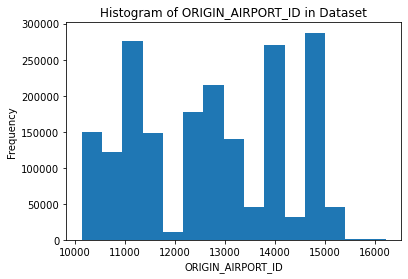

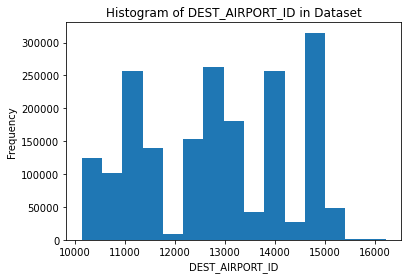

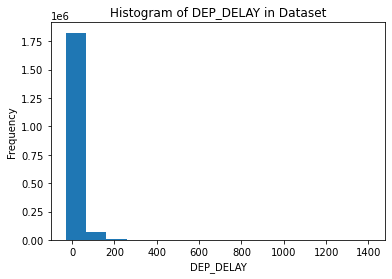

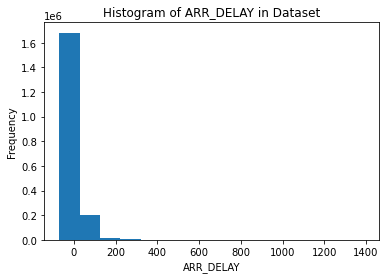

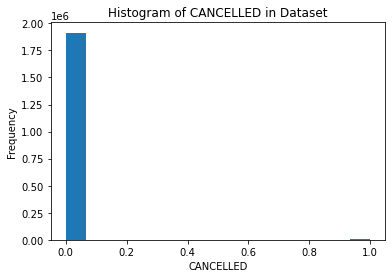

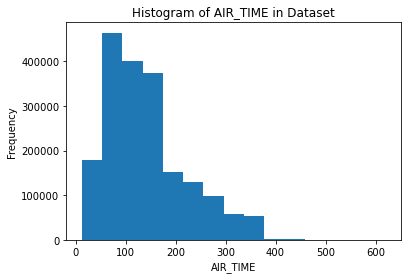

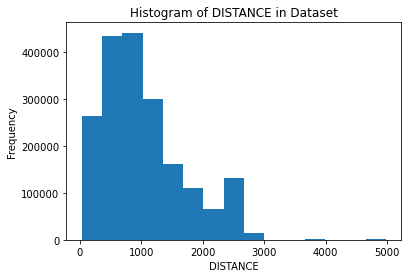

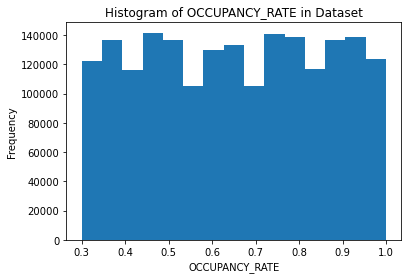

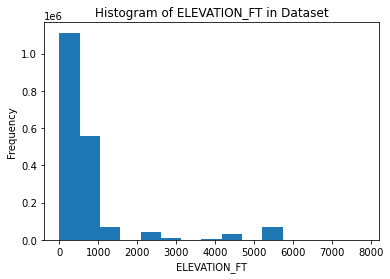

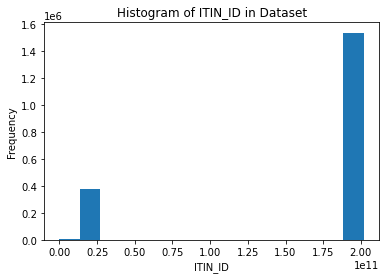

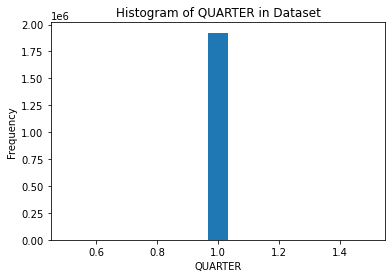

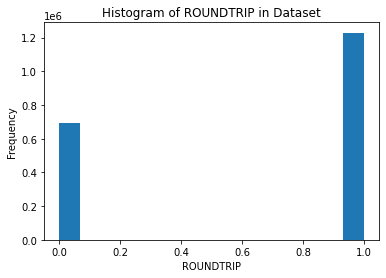

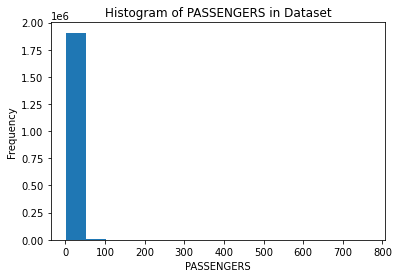

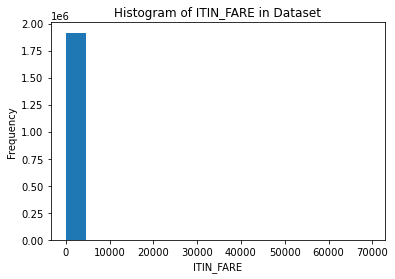

In [10]:
#Creating histogram for numeric fields

def hist(dataframe, name):
    numeric_fields = dataframe.select_dtypes(include='number').columns
    for column in numeric_fields:
        plt.figure()
        plt.hist(dataframe[column], bins=15)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column} in {name}')
        plt.show()
        
hist(updated_dataset, "Dataset")

In [11]:
updated_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924028 entries, 0 to 1924027
Data columns (total 35 columns):
 #   Column             Dtype         
---  ------             -----         
 0   FL_DATE            datetime64[ns]
 1   OP_CARRIER         object        
 2   TAIL_NUM           object        
 3   OP_CARRIER_FL_NUM  object        
 4   ORIGIN_AIRPORT_ID  int64         
 5   ORIGIN             object        
 6   ORIGIN_CITY_NAME   object        
 7   DEST_AIRPORT_ID    int64         
 8   DESTINATION        object        
 9   DEST_CITY_NAME     object        
 10  DEP_DELAY          float64       
 11  ARR_DELAY          float64       
 12  CANCELLED          float64       
 13  AIR_TIME           float64       
 14  DISTANCE           float64       
 15  OCCUPANCY_RATE     float64       
 16  TYPE               object        
 17  NAME               object        
 18  ELEVATION_FT       float64       
 19  CONTINENT          object        
 20  ISO_COUNTRY        objec

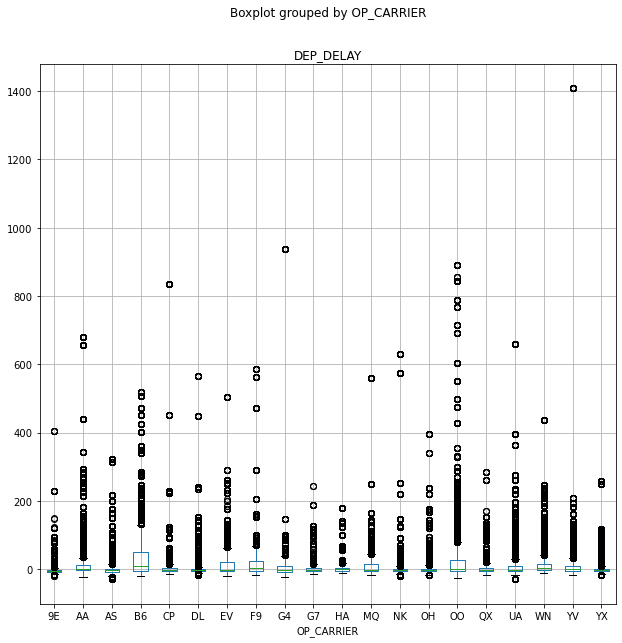

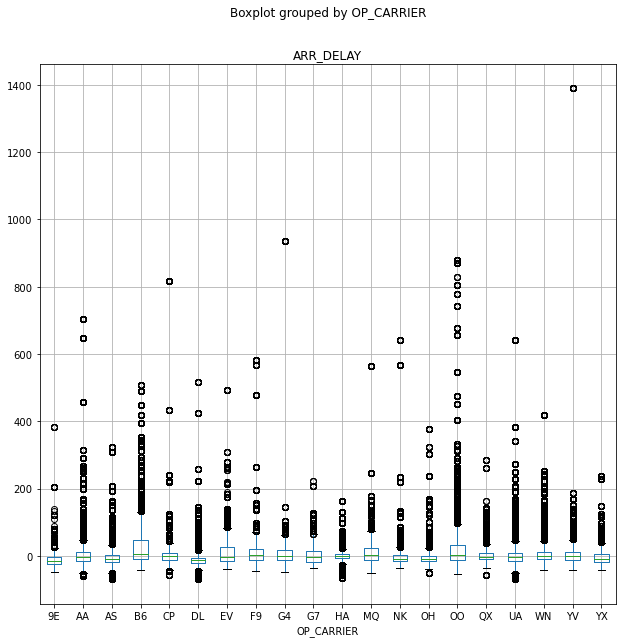

In [12]:
#Check outliers for fields using for loop 
fields =['DEP_DELAY','ARR_DELAY']
for col in fields:
    updated_dataset.boxplot(column=col, by='OP_CARRIER', figsize=(10,10))

In [13]:
#Removing outliers
def remove_outliers(dataframe, columns, lower_percentile, upper_percentile):
    for column in columns:
        lower_limit = dataframe[column].quantile(lower_percentile)
        upper_limit = dataframe[column].quantile(upper_percentile)
        dataframe[column] = dataframe[column].clip(lower=lower_limit, upper=upper_limit)
        median = dataframe[column].median()
        dataframe[column] = dataframe[column].fillna(median)
        
def summary_statistics(dataframe):
    return dataframe.describe()

def boxplot(dataframe, column):
    plt.figure()
    plt.boxplot(dataframe[column])
    plt.xlabel(column)
    plt.title(f'Boxplot of {column}')
    plt.show()
    
#removing outliers and replace them with median
remove_outliers(updated_dataset, ['ARR_DELAY', 'DEP_DELAY'], 0.01, 0.99)

#removing outliers and replace them with median
remove_outliers(updated_dataset, ['ITIN_FARE'], 0.01, 0.95)

In [14]:
summary_statistics(updated_dataset)

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE,ELEVATION_FT,ITIN_ID,QUARTER,ROUNDTRIP,PASSENGERS,ITIN_FARE
count,1.924028e+06,1.924028e+06,1.924028e+06,1.924028e+06,1.924028e+06,1.912058e+06,1.924028e+06,1.924028e+06,1.908551e+06,1.924028e+06,1924028.0,1.924028e+06,1.920196e+06,1.924028e+06
mean,1.272617e+04,1.283860e+04,8.496372e+00,1.690719e+00,5.372063e-03,1.407157e+02,1.035323e+03,6.506588e-01,6.826231e+02,1.650600e+11,1.0,6.387786e-01,3.659647e+00,3.939795e+02
std,1.488989e+03,1.456062e+03,2.648094e+01,2.952447e+01,7.309724e-02,8.079907e+01,6.629321e+02,2.030542e-01,1.210982e+03,7.319202e+10,0.0,4.803547e-01,1.172586e+01,2.499949e+02
min,1.013500e+04,1.013500e+04,-1.300000e+01,-4.100000e+01,0.000000e+00,1.200000e+01,3.100000e+01,3.000000e-01,3.000000e+00,2.019120e+05,1.0,0.000000e+00,1.000000e+00,5.000000e+00
25%,1.129800e+04,1.129800e+04,-5.000000e+00,-1.500000e+01,0.000000e+00,7.900000e+01,5.440000e+02,4.700000e-01,2.100000e+01,2.019112e+11,1.0,0.000000e+00,1.000000e+00,2.130000e+02
50%,1.289200e+04,1.289200e+04,-1.000000e+00,-6.000000e+00,0.000000e+00,1.250000e+02,9.200000e+02,6.500000e-01,1.530000e+02,2.019127e+11,1.0,1.000000e+00,1.000000e+00,3.450000e+02
75%,1.405700e+04,1.410000e+04,9.000000e+00,8.000000e+00,0.000000e+00,1.780000e+02,1.379000e+03,8.300000e-01,7.480000e+02,2.019142e+11,1.0,1.000000e+00,2.000000e+00,5.270000e+02
max,1.621800e+04,1.621800e+04,1.480000e+02,1.420000e+02,1.000000e+00,6.210000e+02,4.983000e+03,1.000000e+00,7.820000e+03,2.019153e+11,1.0,1.000000e+00,7.690000e+02,9.950000e+02


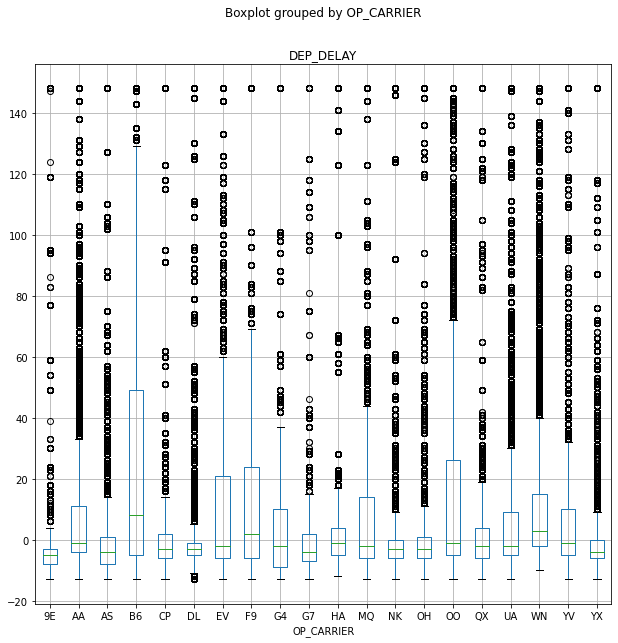

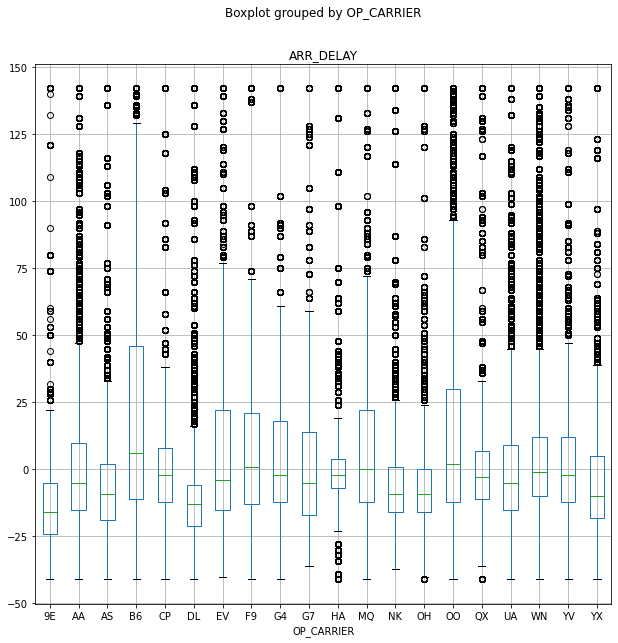

In [15]:
#Check outliers for fields using for loop 
fields =['DEP_DELAY','ARR_DELAY']
for col in fields:
    updated_dataset.boxplot(column=col, by='OP_CARRIER', figsize=(10,10))

In [16]:
#Checking for Null Values
updated_dataset.isnull().sum()

FL_DATE                    0
OP_CARRIER                 0
TAIL_NUM                 148
OP_CARRIER_FL_NUM          0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
ORIGIN_CITY_NAME           0
DEST_AIRPORT_ID            0
DESTINATION                0
DEST_CITY_NAME             0
DEP_DELAY                  0
ARR_DELAY                  0
CANCELLED                  0
AIR_TIME               11970
DISTANCE                   0
OCCUPANCY_RATE             0
TYPE                       0
NAME                       0
ELEVATION_FT           15477
CONTINENT            1923238
ISO_COUNTRY                0
MUNICIPALITY           15477
IATA_CODE                  0
COORDINATES                0
dest_orig                  0
ITIN_ID                    0
YEAR                       0
QUARTER                    0
ORIGIN_COUNTRY             0
ORIGIN_STATE_ABR           0
ORIGIN_STATE_NM            0
ROUNDTRIP                  0
REPORTING_CARRIER          0
PASSENGERS              3832
ITIN_FARE     

In [17]:
#Drop the columns which has maximum null values and are not required for further analysis
drop = ['ELEVATION_FT', 'CONTINENT', 'MUNICIPALITY']
clean_data = updated_dataset.drop(columns=drop)

In [18]:
clean_data=clean_data.dropna()
clean_data=clean_data.drop_duplicates()

In [19]:
clean_data.info()
clean_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1862221 entries, 0 to 1924012
Data columns (total 32 columns):
 #   Column             Dtype         
---  ------             -----         
 0   FL_DATE            datetime64[ns]
 1   OP_CARRIER         object        
 2   TAIL_NUM           object        
 3   OP_CARRIER_FL_NUM  object        
 4   ORIGIN_AIRPORT_ID  int64         
 5   ORIGIN             object        
 6   ORIGIN_CITY_NAME   object        
 7   DEST_AIRPORT_ID    int64         
 8   DESTINATION        object        
 9   DEST_CITY_NAME     object        
 10  DEP_DELAY          float64       
 11  ARR_DELAY          float64       
 12  CANCELLED          float64       
 13  AIR_TIME           float64       
 14  DISTANCE           float64       
 15  OCCUPANCY_RATE     float64       
 16  TYPE               object        
 17  NAME               object        
 18  ISO_COUNTRY        object        
 19  IATA_CODE          object        
 20  COORDINATES        objec

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE,ITIN_ID,QUARTER,ROUNDTRIP,PASSENGERS,ITIN_FARE
count,1.862221e+06,1.862221e+06,1.862221e+06,1.862221e+06,1862221.0,1.862221e+06,1.862221e+06,1.862221e+06,1.862221e+06,1862221.0,1.862221e+06,1.862221e+06,1.862221e+06
mean,1.272692e+04,1.283805e+04,8.567360e+00,1.750756e+00,0.0,1.411043e+02,1.039630e+03,6.506480e-01,1.649881e+11,1.0,6.388098e-01,3.671833e+00,3.947216e+02
std,1.489118e+03,1.455886e+03,2.649201e+01,2.959896e+01,0.0,8.080092e+01,6.635787e+02,2.029563e-01,7.324647e+10,0.0,4.803457e-01,1.180151e+01,2.503407e+02
min,1.013500e+04,1.013500e+04,-1.300000e+01,-4.100000e+01,0.0,1.200000e+01,3.100000e+01,3.000000e-01,2.019120e+05,1.0,0.000000e+00,1.000000e+00,5.000000e+00
25%,1.129800e+04,1.129800e+04,-5.000000e+00,-1.500000e+01,0.0,7.900000e+01,5.460000e+02,4.700000e-01,2.019112e+11,1.0,0.000000e+00,1.000000e+00,2.130000e+02
50%,1.289200e+04,1.289200e+04,-1.000000e+00,-5.000000e+00,0.0,1.260000e+02,9.250000e+02,6.500000e-01,2.019127e+11,1.0,1.000000e+00,1.000000e+00,3.450000e+02
75%,1.405700e+04,1.410000e+04,1.000000e+01,9.000000e+00,0.0,1.790000e+02,1.379000e+03,8.300000e-01,2.019142e+11,1.0,1.000000e+00,2.000000e+00,5.280000e+02
max,1.621800e+04,1.621800e+04,1.480000e+02,1.420000e+02,0.0,6.210000e+02,4.983000e+03,1.000000e+00,2.019153e+11,1.0,1.000000e+00,7.690000e+02,9.950000e+02


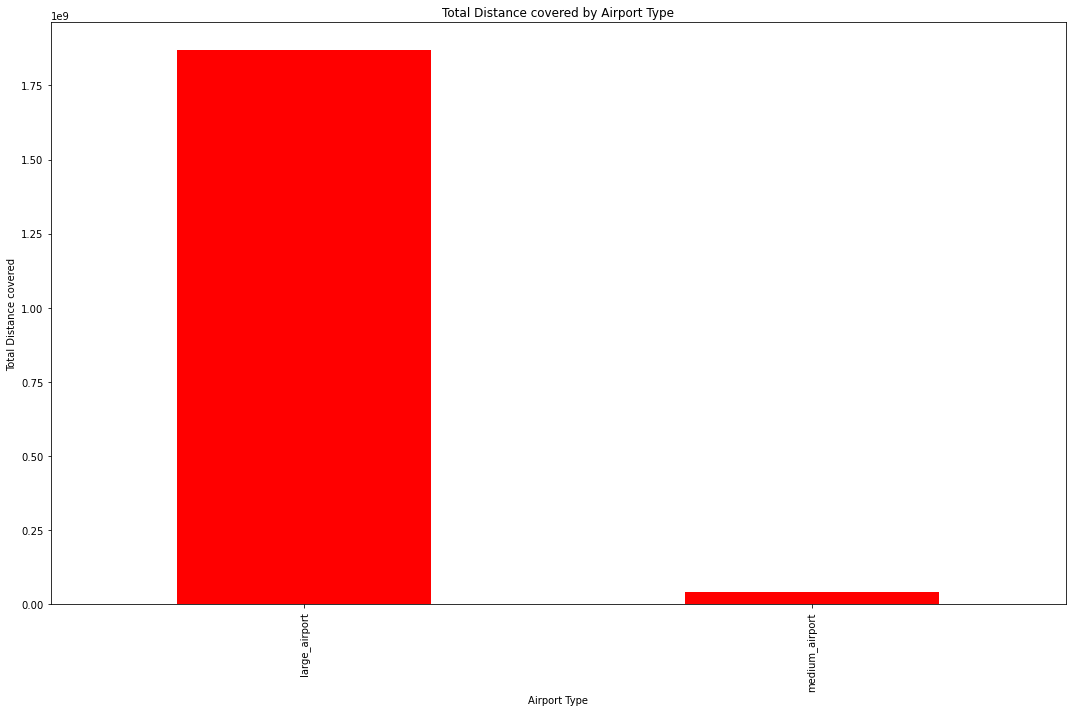

In [20]:
# filter for medium and large airports in the US as it is asked
clean_data = clean_data[clean_data['ISO_COUNTRY'] == 'US']

size_filter = clean_data[clean_data['TYPE'].isin(['medium_airport', 'large_airport'])]

# Combine the data by airport type and aggregate the distance
combined_data = size_filter.groupby('TYPE')['DISTANCE'].sum()

#bar plot based on the aggregated distances
plt.figure(figsize=(15, 10))
combined_data.plot(kind='bar', color='red')
plt.title('Total Distance covered by Airport Type')
plt.xlabel('Airport Type')
plt.ylabel('Total Distance covered')
plt.tight_layout()
plt.show()


In [21]:
#new column 'ROUND_TRIP' by concatenating 'ORIGIN' and 'DESTINATION'
size_filter['ROUND_TRIP'] = size_filter[['ORIGIN', 'DESTINATION']].apply(lambda x: '_'.join(sorted(x)), axis=1)
updated_origin_dest = size_filter

/var/folders/n4/n5xgbz2n743bwqdk7kn1kj680000gn/T/ipykernel_53266/444330105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size_filter['ROUND_TRIP'] = size_filter[['ORIGIN', 'DESTINATION']].apply(lambda x: '_'.join(sorted(x)), axis=1)


In [22]:
updated_origin_dest = updated_origin_dest[(updated_origin_dest['ROUNDTRIP']==1.0) ]
updated_origin_dest

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,...,YEAR,QUARTER,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,ROUND_TRIP
2,2019-01-01,B6,N192JB,130,14635,RSW,"Fort Myers, FL",12478,JFK,"New York, NY",...,2019-01-01,1,US,FL,Florida,1.0,B6,1.0,341.0,JFK_RSW
3,2019-01-01,B6,N192JB,130,14635,RSW,"Fort Myers, FL",12478,JFK,"New York, NY",...,2019-01-01,1,US,FL,Florida,1.0,B6,1.0,265.0,JFK_RSW
9,2019-01-01,B6,N192JB,130,14635,RSW,"Fort Myers, FL",12478,JFK,"New York, NY",...,2019-01-01,1,US,FL,Florida,1.0,B6,1.0,316.0,JFK_RSW
10,2019-01-01,B6,N192JB,130,14635,RSW,"Fort Myers, FL",12478,JFK,"New York, NY",...,2019-01-01,1,US,FL,Florida,1.0,B6,1.0,204.0,JFK_RSW
11,2019-01-01,B6,N192JB,130,14635,RSW,"Fort Myers, FL",12478,JFK,"New York, NY",...,2019-01-01,1,US,FL,Florida,1.0,B6,1.0,793.0,JFK_RSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924008,2019-01-01,MQ,N822AE,3355,11415,DRT,"Del Rio, TX",11298,DFW,"Dallas/Fort Worth, TX",...,2019-01-01,1,US,TX,Texas,1.0,MQ,1.0,196.0,DFW_DRT
1924009,2019-01-01,MQ,N822AE,3355,11415,DRT,"Del Rio, TX",11298,DFW,"Dallas/Fort Worth, TX",...,2019-01-01,1,US,TX,Texas,1.0,MQ,1.0,484.0,DFW_DRT
1924010,2019-01-01,MQ,N822AE,3355,11415,DRT,"Del Rio, TX",11298,DFW,"Dallas/Fort Worth, TX",...,2019-01-01,1,US,TX,Texas,1.0,MQ,1.0,444.0,DFW_DRT
1924011,2019-01-01,MQ,N822AE,3355,11415,DRT,"Del Rio, TX",11298,DFW,"Dallas/Fort Worth, TX",...,2019-01-01,1,US,TX,Texas,1.0,MQ,2.0,322.0,DFW_DRT


# Q1. The 10 busiest round trip routes in terms of number of round trip flights in the quarter.

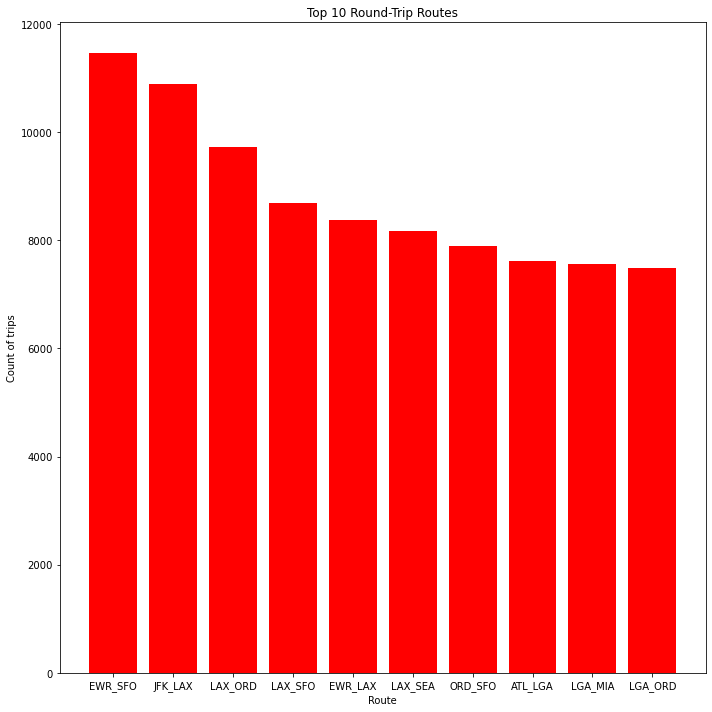

In [23]:
# Performing the group by operation with ROUND_TRIP and storing the data in the new dataframe
combined_data_filtered = updated_origin_dest.groupby('ROUND_TRIP')

# sort it in descending order and count the number
descending_grouped_data = combined_data_filtered.size().sort_values(ascending=False)

# Display the sorted result
display = descending_grouped_data.head(10)

# new DataFrame to store the displayed data
outcome = pd.DataFrame({
    'Route': display.index,
    'Count': display.values
})

# Display the outcome DataFrame
outcome

# Create a bar graph
plt.figure(figsize=(10, 10))
plt.bar(outcome['Route'], outcome['Count'], color='Red')
plt.xlabel('Route')
plt.ylabel('Count of trips')
plt.title('Top 10 Round-Trip Routes')
plt.tight_layout()

# Display the graph
plt.show()

# Q2. The 10 most profitable round trip routes (without considering the upfront airplane cost) in the quarter.

In [24]:
cost_per_mile_fuel = 8
Cost_per_mile_insurance = 1.18
medium_airport = 5000
large_airport = 10000
delay_cost = 75
baggage_fee = 35
max_passenger = 200
baggage_check = 0.5

# Calculate total revenue and total cost for each flight
updated_origin_dest['TOTAL_REVENUE'] = updated_origin_dest['PASSENGERS'] * updated_origin_dest['ITIN_FARE']

updated_origin_dest['TOTAL_COST'] = (updated_origin_dest['PASSENGERS'] * 2 * delay_cost) + \
                                     (updated_origin_dest['PASSENGERS'] * 2 * baggage_check * baggage_fee)

# Group the data by origin and destination
combined_data = updated_origin_dest.groupby(['ROUND_TRIP'])

# Calculate total profit, total round trip flights
combined_data_summary = combined_data.agg({
    'TOTAL_REVENUE': 'sum',
    'TOTAL_COST': 'sum',
    'PASSENGERS': 'sum',
    'ITIN_FARE': 'mean'
}).reset_index()

# Calculate the profit for each route 
combined_data_summary['PROFIT'] = combined_data_summary['TOTAL_REVENUE'] - combined_data_summary['TOTAL_COST']

# profit in descending order to get the top 10 most profitable routes
top_routes = combined_data_summary.sort_values(by='PROFIT', ascending=False).head(10)

# Display the top 10 most profitable routes
print("Top 10 Most Profitable Routes:")
top_routes


Top 10 Most Profitable Routes:


/var/folders/n4/n5xgbz2n743bwqdk7kn1kj680000gn/T/ipykernel_53266/3351795475.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_origin_dest['TOTAL_REVENUE'] = updated_origin_dest['PASSENGERS'] * updated_origin_dest['ITIN_FARE']
/var/folders/n4/n5xgbz2n743bwqdk7kn1kj680000gn/T/ipykernel_53266/3351795475.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_origin_dest['TOTAL_COST'] = (updated_origin_dest['PASSENGERS'] * 2 * delay_cost) + \


,ROUND_TRIP,TOTAL_REVENUE,TOTAL_COST,PASSENGERS,ITIN_FARE,PROFIT
1708,JFK_LAX,18752623.0,7701735.0,41631.0,606.804242,11050888.0
1346,EWR_SFO,15614472.0,5434560.0,29376.0,679.766329,10179912.0
1314,EWR_LAX,13311464.0,5688380.0,30748.0,599.741874,7623084.0
2179,ORD_SFO,10601185.0,4316605.0,23333.0,602.256973,6284580.0
868,DAL_HOU,13081671.0,7244415.0,39159.0,363.912162,5837256.0
1819,LAX_ORD,11493633.0,6132935.0,33151.0,481.668691,5360698.0
168,ATL_LGA,9895804.0,4806115.0,25979.0,480.334383,5089689.0
2161,ORD_PHX,9187188.0,4152325.0,22445.0,521.644653,5034863.0
165,ATL_LAX,8529517.0,3553110.0,19206.0,628.562961,4976407.0
1145,DFW_ORD,8489962.0,3606205.0,19493.0,484.173601,4883757.0


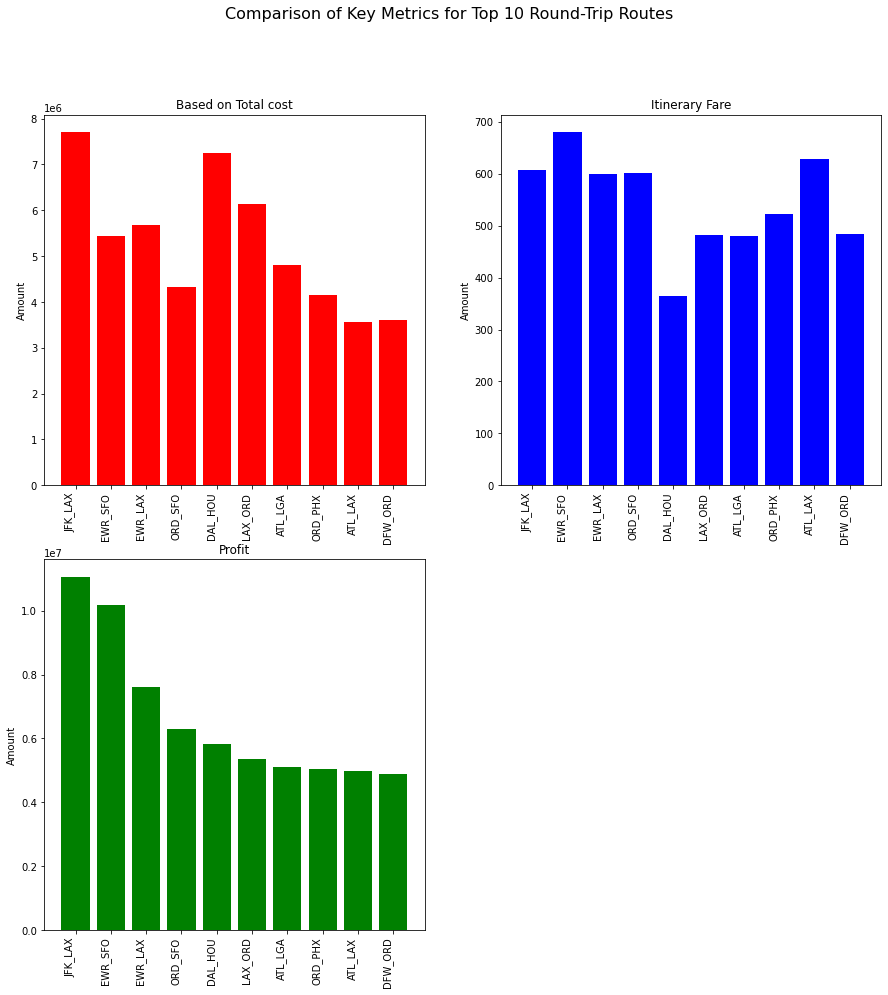

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Comparison of Key Metrics for Top 10 Round-Trip Routes', fontsize=16)

# Bar graph based on total cost
axes[0, 0].bar(top_routes['ROUND_TRIP'], top_routes['TOTAL_COST'], color='red')
axes[0, 0].set_title('Based on Total cost')
axes[0, 0].set_xticks(top_routes['ROUND_TRIP'])
axes[0, 0].set_xticklabels(top_routes['ROUND_TRIP'], rotation=90, ha='right')
axes[0, 0].set_ylabel('Amount')

#Bar graph based on Itinerary Fare
axes[0, 1].bar(top_routes['ROUND_TRIP'], top_routes['ITIN_FARE'], color='blue')
axes[0, 1].set_title('Itinerary Fare')
axes[0, 1].set_xticks(top_routes['ROUND_TRIP'])
axes[0, 1].set_xticklabels(top_routes['ROUND_TRIP'], rotation=90, ha='right')
axes[0, 1].set_ylabel('Amount')

#Bar graph based on PROFIT
axes[1, 0].bar(top_routes['ROUND_TRIP'], top_routes['PROFIT'], color='green')
axes[1, 0].set_title('Profit')
axes[1, 0].set_xticks(top_routes['ROUND_TRIP'])
axes[1, 0].set_xticklabels(top_routes['ROUND_TRIP'], rotation=90, ha='right')
axes[1, 0].set_ylabel('Amount')


# Hide empty subplot
axes[1, 1].axis('off')

# Display the plots
plt.show()


# Q3.  The 5 round trip routes that you recommend to invest in based on any factors that you choose.

# Recommended top 5 round trips

In [26]:
top_5 = combined_data_summary.sort_values(by='PROFIT', ascending=False).head(5)
print("Top 5 round trip routes to invest in based on profit:")
print(top_5[['ROUND_TRIP', 'PROFIT']])
top_5 = top_5[['ROUND_TRIP', 'PROFIT']]

print("")

top_5 = combined_data_summary.sort_values(by='ITIN_FARE', ascending=False).head(5)
print("Top 5 round trip routes to invest in based on Itinerary Fare:")
print(top_5[['ROUND_TRIP', 'ITIN_FARE']])
top_5 = top_5[['ROUND_TRIP', 'ITIN_FARE']]

print("")

top_5 = combined_data_summary.sort_values(by='TOTAL_COST', ascending=False).head(5)
print("Top 5 round trip routes to invest in based on total cost:")
print(top_5[['ROUND_TRIP', 'TOTAL_COST']])
top_5 = top_5[['ROUND_TRIP', 'TOTAL_COST']]

Top 5 round trip routes to invest in based on profit:
     ROUND_TRIP      PROFIT
1708    JFK_LAX  11050888.0
1346    EWR_SFO  10179912.0
1314    EWR_LAX   7623084.0
2179    ORD_SFO   6284580.0
868     DAL_HOU   5837256.0

Top 5 round trip routes to invest in based on Itinerary Fare:
     ROUND_TRIP   ITIN_FARE
141     ATL_FSD  981.000000
68      ANC_DEN  928.352941
1480    GUM_HNL  918.846154
775     CLT_TRI  895.000000
1065    DEN_SUN  884.000000

Top 5 round trip routes to invest in based on total cost:
     ROUND_TRIP  TOTAL_COST
1501    HNL_OGG  12390560.0
1708    JFK_LAX   7701735.0
1834    LAX_SFO   7318600.0
868     DAL_HOU   7244415.0
1498    HNL_LIH   6843520.0


# Q4. The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trip routes that you recommend. Print key summary components for these route

Top 5 recommended routes:
  ROUND_TRIP      PROFIT  breakeven
0    JFK_LAX  11050888.0   8.144142
1    EWR_SFO  10179912.0   8.840941
2    EWR_LAX   7623084.0  11.806245
3    ORD_SFO   6284580.0  14.320766
4    DAL_HOU   5837256.0  15.418203



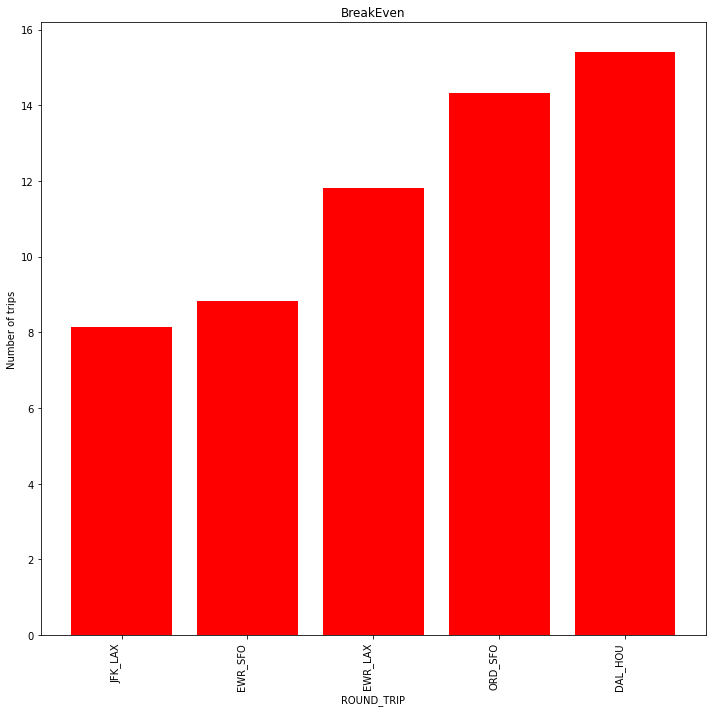

In [27]:
# Create a DataFrame from the profit data
dataframe = {
    'ROUND_TRIP': ['JFK_LAX', 'EWR_SFO', 'EWR_LAX', 'ORD_SFO', 'DAL_HOU'],
    'PROFIT': [11050888.0, 10179912.0, 7623084.0, 6284580.0, 5837256.0]
}

suggested_routes = pd.DataFrame(dataframe)

# Calculate number of trips to break even
suggested_routes['breakeven'] = 90000000 / suggested_routes['PROFIT']

print("Top 5 recommended routes:")
print(suggested_routes[['ROUND_TRIP', 'PROFIT', 'breakeven']])

print("")

plt.figure(figsize=(10, 10))
plt.bar(suggested_routes['ROUND_TRIP'], suggested_routes['breakeven'], color='red')
plt.xlabel('ROUND_TRIP')
plt.ylabel('Number of trips')
plt.title('BreakEven')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

# Q5. Key Performance Indicators (KPI’s) that you recommend tracking in the future to measure the success of the round trip routes that you recommend.

Profitability: Monitor the profitability of each round-trip route regularly.

Performance: Track the performance of each round-trip route, measuring the percentage of flights that depart and arrive on time.

Customer Retention: Track the percentage of customers who choose to fly the same route again.

Cancellations and Delays: Track the number of flight cancellations and delays for each route.

Number of Round Trips: An increase in the number of rounds trips can be an indicator of success due to the
revenue received for each passenger for each flight


# Metadata
1.	flights_airport_codes: This is created when flights and airport_codes dataset are merged on Origin from flights and IATA_CODE from airport_codes dataset.

2.	updated_dataset: The flights_airport_codes data was merged on tickets data using - 'FL_DATE', 'ORIGIN', 'DESTINATION', 'OP_CARRIER' from flights_airport_codes data and 'YEAR', 'ORIGIN', 'DESTINATION', 'REPORTING_CARRIER' - from tickets data using inner join.

3.	dest_orig: This is a combination of the origin and destination from flights dataset.

4.	clean_data: This is created after dropping columns which has maximum null values.

5.	size_filter: This is created to filter out large airport and medium airport as it is asked in the question.

6.	combined_data: This is created to group the airport type and the distance by a flight.
7.	ROUND_TRIP: This is created by concatenating ‘ORIGIN’ and ‘DESTINATION’ columns in the flight dataset. This column will show the round-trip which is 1 from one point to other point. 

8.	updated_origin_dest: This is created to store the result of the round trip of medium and large airports.

9.	TOTAL_COST: This is the total cost incurred by the airline. This was obtained using max_passengers, delay_cost, baggage_check, baggage_fee.

10.	PROFIT: This is (total revenue - total cost).